# IS THERE A DIFFERENCE IN THE AVERAGE LAP TIMES OF CONSTRUCTORS IN THE 2023 AND 2024 SEASON?

## Import Libraries

In [166]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_rel
# For plotting
import matplotlib.pyplot as plt

## DATA CLEANING

## I. Results Data

In [10]:
results_df = pd.read_csv("results.csv")
results_df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [13]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26759 entries, 0 to 26758
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         26759 non-null  int64  
 1   raceId           26759 non-null  int64  
 2   driverId         26759 non-null  int64  
 3   constructorId    26759 non-null  int64  
 4   number           26759 non-null  object 
 5   grid             26759 non-null  int64  
 6   position         26759 non-null  object 
 7   positionText     26759 non-null  object 
 8   positionOrder    26759 non-null  int64  
 9   points           26759 non-null  float64
 10  laps             26759 non-null  int64  
 11  time             26759 non-null  object 
 12  milliseconds     26759 non-null  object 
 13  fastestLap       26759 non-null  object 
 14  rank             26759 non-null  object 
 15  fastestLapTime   26759 non-null  object 
 16  fastestLapSpeed  26759 non-null  object 
 17  statusId    

In [22]:
# drop unnecesary columns 
results_df = results_df.loc[:, :"constructorId"]
results_df.head()

,resultId,raceId,driverId,constructorId
0,1,18,1,1
1,2,18,2,2
2,3,18,3,3
3,4,18,4,4
4,5,18,5,1


# II. Constructor Data

In [16]:
constructor_df = pd.read_csv("constructors.csv")
constructor_df.rename(columns={'name': 'constructor_name'}, inplace=True)
constructor_df.rename(columns={'nationality': 'constructor_nationality'}, inplace=True)
constructor_df.head()

,constructorId,constructorRef,constructor_name,constructor_nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [18]:
constructor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   constructorId            212 non-null    int64 
 1   constructorRef           212 non-null    object
 2   constructor_name         212 non-null    object
 3   constructor_nationality  212 non-null    object
 4   url                      212 non-null    object
dtypes: int64(1), object(4)
memory usage: 8.4+ KB


In [24]:
# drop unnecesary columns 
constructor_df.drop(['url', 'constructorRef'], axis=1, inplace=True)
constructor_df.head()

,constructorId,constructor_name,constructor_nationality
0,1,McLaren,British
1,2,BMW Sauber,German
2,3,Williams,British
3,4,Renault,French
4,5,Toro Rosso,Italian


## III. Lap Times Data

In [27]:
lap_times_df = pd.read_csv("lap_times.csv")
lap_times_df.rename(columns={'time': 'lap_time'}, inplace=True)
lap_times_df.head()

,raceId,driverId,lap,position,lap_time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


In [29]:
lap_times_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589081 entries, 0 to 589080
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   raceId        589081 non-null  int64 
 1   driverId      589081 non-null  int64 
 2   lap           589081 non-null  int64 
 3   position      589081 non-null  int64 
 4   lap_time      589081 non-null  object
 5   milliseconds  589081 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 27.0+ MB


## IV. Drivers Data

In [39]:
drivers_df = pd.read_csv("drivers.csv")
drivers_df.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [41]:
drivers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861 entries, 0 to 860
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     861 non-null    int64 
 1   driverRef    861 non-null    object
 2   number       861 non-null    object
 3   code         861 non-null    object
 4   forename     861 non-null    object
 5   surname      861 non-null    object
 6   dob          861 non-null    object
 7   nationality  861 non-null    object
 8   url          861 non-null    object
dtypes: int64(1), object(8)
memory usage: 60.7+ KB


In [43]:
# drop unnecesary columns 
drivers_df.drop(['driverRef', 'number', 'code', 'dob', 'nationality', 'url'], axis=1, inplace=True)
drivers_df.head()

,driverId,forename,surname
0,1,Lewis,Hamilton
1,2,Nick,Heidfeld
2,3,Nico,Rosberg
3,4,Fernando,Alonso
4,5,Heikki,Kovalainen


## V. Races Data

In [132]:
races_df = pd.read_csv("races.csv")
races_df.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [134]:
races_df = races_df[['raceId', 'year', 'name']]
races_df.rename(columns={'name': 'race_name'}, inplace=True)
races_df.head()

,raceId,year,race_name
0,1,2009,Australian Grand Prix
1,2,2009,Malaysian Grand Prix
2,3,2009,Chinese Grand Prix
3,4,2009,Bahrain Grand Prix
4,5,2009,Spanish Grand Prix


## MERGING RESULTS WITH CONSTRUCTOR DATA

In [137]:
results_constructor = pd.merge(results_df, constructor_df, on="constructorId", how="left")
results_constructor.head()

,resultId,raceId,driverId,constructorId,constructor_name,constructor_nationality
0,1,18,1,1,McLaren,British
1,2,18,2,2,BMW Sauber,German
2,3,18,3,3,Williams,British
3,4,18,4,4,Renault,French
4,5,18,5,1,McLaren,British


## MERGING DRIVERS WITH RESULT AND CONSTRUCTOR DATA

In [140]:
rcd_df = pd.merge(results_constructor, drivers_df, on="driverId", how="left")
rcd_df.head()

,resultId,raceId,driverId,constructorId,constructor_name,constructor_nationality,forename,surname
0,1,18,1,1,McLaren,British,Lewis,Hamilton
1,2,18,2,2,BMW Sauber,German,Nick,Heidfeld
2,3,18,3,3,Williams,British,Nico,Rosberg
3,4,18,4,4,Renault,French,Fernando,Alonso
4,5,18,5,1,McLaren,British,Heikki,Kovalainen


## MERGE LAPTIME WITH THE Result Constructor Data DF

In [143]:
new_df = pd.merge(lap_times_df, rcd_df, on=["raceId", "driverId"], how="left")
new_df.head()

,raceId,driverId,lap,position,lap_time,milliseconds,resultId,constructorId,constructor_name,constructor_nationality,forename,surname
0,841,20,1,1,1:38.109,98109,20779,9,Red Bull,Austrian,Sebastian,Vettel
1,841,20,2,1,1:33.006,93006,20779,9,Red Bull,Austrian,Sebastian,Vettel
2,841,20,3,1,1:32.713,92713,20779,9,Red Bull,Austrian,Sebastian,Vettel
3,841,20,4,1,1:32.803,92803,20779,9,Red Bull,Austrian,Sebastian,Vettel
4,841,20,5,1,1:32.342,92342,20779,9,Red Bull,Austrian,Sebastian,Vettel


## MERGE NEW DF WITH RACE DF

In [146]:
complete_df = pd.merge(races_df, new_df, on="raceId", how="left")
complete_df.head()

,raceId,year,race_name,driverId,lap,position,lap_time,milliseconds,resultId,constructorId,constructor_name,constructor_nationality,forename,surname
0,1,2009,Australian Grand Prix,1.0,1.0,13.0,1:49.088,109088.0,7573.0,1.0,McLaren,British,Lewis,Hamilton
1,1,2009,Australian Grand Prix,1.0,2.0,12.0,1:33.740,93740.0,7573.0,1.0,McLaren,British,Lewis,Hamilton
2,1,2009,Australian Grand Prix,1.0,3.0,11.0,1:31.600,91600.0,7573.0,1.0,McLaren,British,Lewis,Hamilton
3,1,2009,Australian Grand Prix,1.0,4.0,10.0,1:31.067,91067.0,7573.0,1.0,McLaren,British,Lewis,Hamilton
4,1,2009,Australian Grand Prix,1.0,5.0,10.0,1:32.129,92129.0,7573.0,1.0,McLaren,British,Lewis,Hamilton


## Feature Engineering

In [149]:
# add laptime in seconds table
complete_df["laptime_seconds"] = complete_df["milliseconds"] / 1000

complete_df.head()

,raceId,year,race_name,driverId,lap,position,lap_time,milliseconds,resultId,constructorId,constructor_name,constructor_nationality,forename,surname,laptime_seconds
0,1,2009,Australian Grand Prix,1.0,1.0,13.0,1:49.088,109088.0,7573.0,1.0,McLaren,British,Lewis,Hamilton,109.088
1,1,2009,Australian Grand Prix,1.0,2.0,12.0,1:33.740,93740.0,7573.0,1.0,McLaren,British,Lewis,Hamilton,93.740
2,1,2009,Australian Grand Prix,1.0,3.0,11.0,1:31.600,91600.0,7573.0,1.0,McLaren,British,Lewis,Hamilton,91.600
3,1,2009,Australian Grand Prix,1.0,4.0,10.0,1:31.067,91067.0,7573.0,1.0,McLaren,British,Lewis,Hamilton,91.067
4,1,2009,Australian Grand Prix,1.0,5.0,10.0,1:32.129,92129.0,7573.0,1.0,McLaren,British,Lewis,Hamilton,92.129


## Summary Statistics (2023-2024)

In [153]:
# FILTER 2023 DATA
df_2023 = complete_df[complete_df["year"] == 2023]

# Compute mean and median of laptime_seconds per constructor in 2023
constructor_stats_2023 = (
    df_2023
    .groupby("constructor_name")["laptime_seconds"]
    .agg(["mean", "median"])
    .reset_index()
)
constructor_stats_2023.columns = ["constructor_name", "mean_laptime_2023", "median_laptime_2023"]

# FILTER 2024 DATA
df_2024 = complete_df[complete_df["year"] == 2024]

# Compute mean and median of laptime_seconds per constructor in 2024
constructor_stats_2024 = (
    df_2024
    .groupby("constructor_name")["laptime_seconds"]
    .agg(["mean", "median"])
    .reset_index()
)
constructor_stats_2024.columns = ["constructor_name", "mean_laptime_2024", "median_laptime_2024"]

# only merge where teams participated in both of the season
constructor_stats = pd.merge(
    constructor_stats_2023, 
    constructor_stats_2024, 
    on="constructor_name", 
    how="inner" 
)

# fix order of columns
constructor_stats = constructor_stats[
    ["constructor_name", 
     "mean_laptime_2023", "mean_laptime_2024", 
     "median_laptime_2023", "median_laptime_2024"]
]

constructor_stats

,constructor_name,mean_laptime_2023,mean_laptime_2024,median_laptime_2023,median_laptime_2024
0,Alpine F1 Team,98.201935,95.463766,90.3755,89.5040
1,Aston Martin,98.919018,95.564487,89.0380,89.8725
2,Ferrari,96.276328,94.878616,90.9330,88.4730
3,Haas F1 Team,98.816163,94.483306,92.0850,90.8300
4,McLaren,98.475085,94.693976,88.0035,87.9310
5,Mercedes,98.042532,94.849137,90.6515,87.7450
6,Red Bull,99.170085,94.739496,89.3935,89.7500
7,Williams,97.129798,95.110725,91.9560,90.1480


## Data Visualization

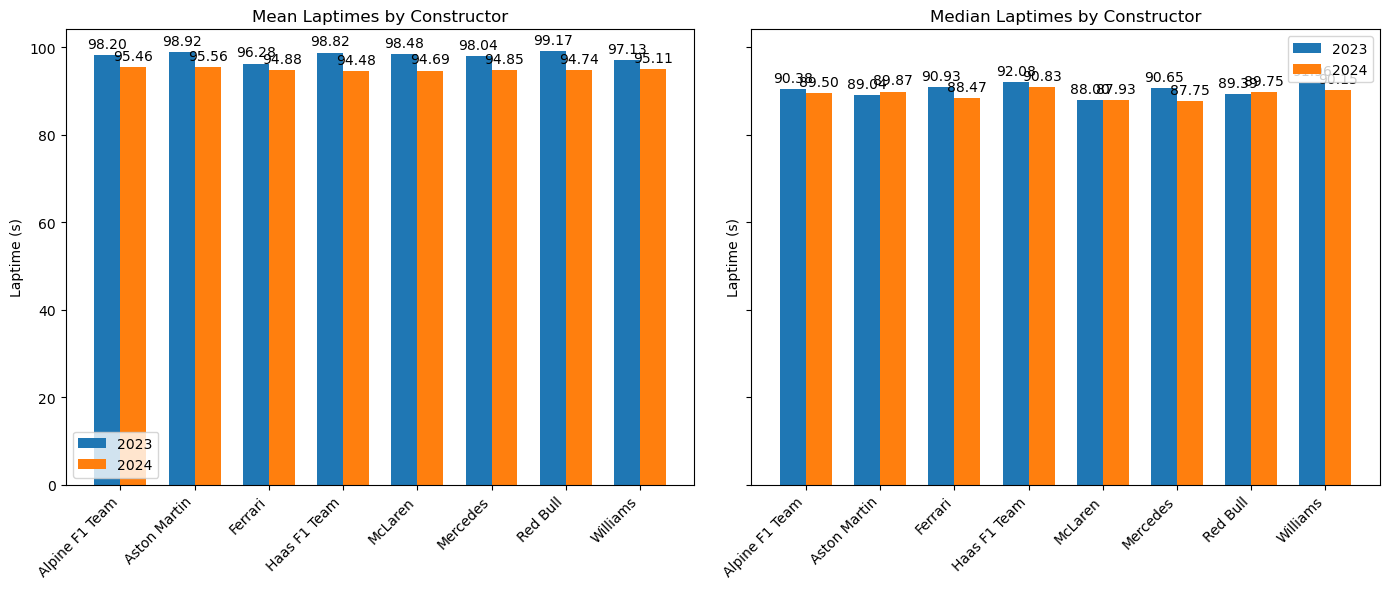

In [158]:
constructors = constructor_stats["constructor_name"]
mean_2023 = constructor_stats["mean_laptime_2023"]
mean_2024 = constructor_stats["mean_laptime_2024"]
median_2023 = constructor_stats["median_laptime_2023"]
median_2024 = constructor_stats["median_laptime_2024"]

x = np.arange(len(constructors))
width = 0.35

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Subplot 1: Mean
rects1_1 = ax1.bar(x - width/2, mean_2023, width, label='2023')
rects1_2 = ax1.bar(x + width/2, mean_2024, width, label='2024')

ax1.set_ylabel('Laptime (s)')
ax1.set_title('Mean Laptimes by Constructor')
ax1.set_xticks(x)
ax1.set_xticklabels(constructors, rotation=45, ha='right')
ax1.legend()

# Annotate
for rects in [rects1_1, rects1_2]:
    for rect in rects:
        height = rect.get_height()
        ax1.annotate(f'{height:.2f}',
                     xy=(rect.get_x() + rect.get_width() / 2, height),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha='center', va='bottom')

# Subplot 2: Median
rects2_1 = ax2.bar(x - width/2, median_2023, width, label='2023')
rects2_2 = ax2.bar(x + width/2, median_2024, width, label='2024')

ax2.set_ylabel('Laptime (s)')
ax2.set_title('Median Laptimes by Constructor')
ax2.set_xticks(x)
ax2.set_xticklabels(constructors, rotation=45, ha='right')
ax2.legend()

# Annotate
for rects in [rects2_1, rects2_2]:
    for rect in rects:
        height = rect.get_height()
        ax2.annotate(f'{height:.2f}',
                     xy=(rect.get_x() + rect.get_width() / 2, height),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Hypothesis Test

**H₀ (null hypothesis):** There is no difference in the lap times of constructors in the 2023 (pre-test) and 2024 (post-test) season  
**Hₐ (alternative hypothesis):** There is a difference in the lap times of constructors in the 2023 (pre-test) and 2024 (post-test) season

### Test for Normality

In [178]:
from scipy.stats import shapiro
diff = mean_2024 - mean_2023
stat, p = shapiro(diff)
print(f"Shapiro-Wilk Test p-value: {p}") 

if p > 0.05:
    print("Differences are normally distributed (t-test is valid).")
else:
    print("Differences are NOT normally distributed (consider Wilcoxon signed-rank test).")

Shapiro-Wilk Test p-value: 0.7242133315363266
Differences are normally distributed (t-test is valid).


In [182]:
t_stat, p_value = ttest_rel(mean_2023, mean_2024)

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

alpha = 0.05
if p_value > alpha:
    print("Fail to reject the null hypothesis: No significant difference in lap times between 2023 and 2024.")
else:
    print("Reject the null hypothesis: There is a significant difference in lap times between 2023 and 2024.")

T-Statistic: 8.349854047460651
P-Value: 6.928298103739378e-05
Reject the null hypothesis: There is a significant difference in lap times between 2023 and 2024.
